In [76]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [77]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False)
        )
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.zero_()
    
    def forward(self, x):
        return self.layers(x)

In [78]:
torch.manual_seed(3)

In [79]:
train_dataset = MNIST('./mnist_train/', train=True, download=True, transform=transforms.ToTensor())

In [80]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [81]:
test_dataset = MNIST('./mnist_test', train=False, download=True, transform=transforms.ToTensor())

In [82]:
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [83]:
torch.manual_seed(3)

In [84]:
mlp = MLP()

In [85]:
ce_loss = nn.CrossEntropyLoss()

In [86]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)

In [87]:
costs = []

In [88]:
print('Starting training...')
for epoch in range(0, 200):
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    epoch_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = ce_loss(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
        if i % 100 == 99:
            print('Loss after batch %5d: %.3f' % ((i+1)*32, current_loss))
            epoch_loss += current_loss
            current_loss = 0.0
    costs.append(epoch_loss)
print('Training completed')

Starting training...
Starting epoch 1
Loss after batch  3200: 237.687
Loss after batch  6400: 237.032
Loss after batch  9600: 235.681
Loss after batch 12800: 235.916
Loss after batch 16000: 234.113
Loss after batch 19200: 234.491
Loss after batch 22400: 233.650
Loss after batch 25600: 232.746
Loss after batch 28800: 233.691
Loss after batch 32000: 232.729
Loss after batch 35200: 231.770
Loss after batch 38400: 230.975
Loss after batch 41600: 231.817
Loss after batch 44800: 230.886
Loss after batch 48000: 230.907
Loss after batch 51200: 230.244
Loss after batch 54400: 230.273
Loss after batch 57600: 229.435
Starting epoch 2
Loss after batch  3200: 229.484
Loss after batch  6400: 229.121
Loss after batch  9600: 228.233
Loss after batch 12800: 228.289
Loss after batch 16000: 226.804
Loss after batch 19200: 226.662
Loss after batch 22400: 225.898
Loss after batch 25600: 227.447
Loss after batch 28800: 225.950
Loss after batch 32000: 225.066
Loss after batch 35200: 224.215
Loss after batch 

Loss after batch 48000: 203.908
Loss after batch 51200: 203.247
Loss after batch 54400: 206.445
Loss after batch 57600: 204.319
Starting epoch 15
Loss after batch  3200: 204.663
Loss after batch  6400: 206.361
Loss after batch  9600: 205.451
Loss after batch 12800: 205.516
Loss after batch 16000: 204.669
Loss after batch 19200: 204.458
Loss after batch 22400: 204.197
Loss after batch 25600: 204.558
Loss after batch 28800: 204.730
Loss after batch 32000: 206.622
Loss after batch 35200: 202.799
Loss after batch 38400: 206.205
Loss after batch 41600: 206.389
Loss after batch 44800: 204.674
Loss after batch 48000: 203.669
Loss after batch 51200: 203.708
Loss after batch 54400: 205.046
Loss after batch 57600: 202.851
Starting epoch 16
Loss after batch  3200: 202.769
Loss after batch  6400: 203.885
Loss after batch  9600: 205.026
Loss after batch 12800: 203.696
Loss after batch 16000: 206.958
Loss after batch 19200: 205.247
Loss after batch 22400: 204.607
Loss after batch 25600: 205.228
Loss

Loss after batch 38400: 205.180
Loss after batch 41600: 202.728
Loss after batch 44800: 202.883
Loss after batch 48000: 200.465
Loss after batch 51200: 201.566
Loss after batch 54400: 201.083
Loss after batch 57600: 199.344
Starting epoch 29
Loss after batch  3200: 200.145
Loss after batch  6400: 200.036
Loss after batch  9600: 202.004
Loss after batch 12800: 200.407
Loss after batch 16000: 203.001
Loss after batch 19200: 202.847
Loss after batch 22400: 202.042
Loss after batch 25600: 202.203
Loss after batch 28800: 201.473
Loss after batch 32000: 201.826
Loss after batch 35200: 200.121
Loss after batch 38400: 202.508
Loss after batch 41600: 202.233
Loss after batch 44800: 201.261
Loss after batch 48000: 200.823
Loss after batch 51200: 201.816
Loss after batch 54400: 201.133
Loss after batch 57600: 200.880
Starting epoch 30
Loss after batch  3200: 201.673
Loss after batch  6400: 201.185
Loss after batch  9600: 201.638
Loss after batch 12800: 201.827
Loss after batch 16000: 202.633
Loss

Loss after batch 28800: 200.396
Loss after batch 32000: 201.462
Loss after batch 35200: 201.788
Loss after batch 38400: 200.768
Loss after batch 41600: 201.557
Loss after batch 44800: 199.049
Loss after batch 48000: 200.346
Loss after batch 51200: 201.378
Loss after batch 54400: 199.866
Loss after batch 57600: 199.227
Starting epoch 43
Loss after batch  3200: 200.136
Loss after batch  6400: 201.171
Loss after batch  9600: 198.903
Loss after batch 12800: 199.421
Loss after batch 16000: 198.978
Loss after batch 19200: 201.654
Loss after batch 22400: 201.889
Loss after batch 25600: 199.961
Loss after batch 28800: 198.797
Loss after batch 32000: 198.566
Loss after batch 35200: 199.727
Loss after batch 38400: 197.804
Loss after batch 41600: 201.498
Loss after batch 44800: 200.975
Loss after batch 48000: 198.913
Loss after batch 51200: 200.397
Loss after batch 54400: 200.156
Loss after batch 57600: 202.651
Starting epoch 44
Loss after batch  3200: 201.913
Loss after batch  6400: 200.057
Loss

Loss after batch 19200: 200.441
Loss after batch 22400: 198.695
Loss after batch 25600: 199.740
Loss after batch 28800: 200.120
Loss after batch 32000: 200.216
Loss after batch 35200: 198.702
Loss after batch 38400: 199.895
Loss after batch 41600: 197.811
Loss after batch 44800: 198.992
Loss after batch 48000: 200.460
Loss after batch 51200: 200.773
Loss after batch 54400: 200.328
Loss after batch 57600: 198.910
Starting epoch 57
Loss after batch  3200: 199.542
Loss after batch  6400: 200.141
Loss after batch  9600: 200.231
Loss after batch 12800: 198.948
Loss after batch 16000: 198.871
Loss after batch 19200: 197.533
Loss after batch 22400: 199.520
Loss after batch 25600: 201.090
Loss after batch 28800: 199.613
Loss after batch 32000: 200.180
Loss after batch 35200: 199.823
Loss after batch 38400: 197.839
Loss after batch 41600: 197.983
Loss after batch 44800: 198.349
Loss after batch 48000: 198.334
Loss after batch 51200: 199.723
Loss after batch 54400: 200.919
Loss after batch 57600

Loss after batch  9600: 198.369
Loss after batch 12800: 199.432
Loss after batch 16000: 199.336
Loss after batch 19200: 200.858
Loss after batch 22400: 198.864
Loss after batch 25600: 199.850
Loss after batch 28800: 198.531
Loss after batch 32000: 199.174
Loss after batch 35200: 197.809
Loss after batch 38400: 201.702
Loss after batch 41600: 197.889
Loss after batch 44800: 197.345
Loss after batch 48000: 198.964
Loss after batch 51200: 197.928
Loss after batch 54400: 198.793
Loss after batch 57600: 198.630
Starting epoch 71
Loss after batch  3200: 198.235
Loss after batch  6400: 199.635
Loss after batch  9600: 200.082
Loss after batch 12800: 198.290
Loss after batch 16000: 198.708
Loss after batch 19200: 196.119
Loss after batch 22400: 199.164
Loss after batch 25600: 199.641
Loss after batch 28800: 199.999
Loss after batch 32000: 200.146
Loss after batch 35200: 196.512
Loss after batch 38400: 200.054
Loss after batch 41600: 198.246
Loss after batch 44800: 199.302
Loss after batch 48000

Loss after batch 57600: 198.913
Starting epoch 84
Loss after batch  3200: 198.583
Loss after batch  6400: 199.052
Loss after batch  9600: 197.909
Loss after batch 12800: 198.604
Loss after batch 16000: 197.826
Loss after batch 19200: 196.895
Loss after batch 22400: 196.798
Loss after batch 25600: 199.034
Loss after batch 28800: 199.741
Loss after batch 32000: 198.249
Loss after batch 35200: 198.444
Loss after batch 38400: 197.886
Loss after batch 41600: 198.578
Loss after batch 44800: 199.195
Loss after batch 48000: 197.549
Loss after batch 51200: 200.246
Loss after batch 54400: 197.867
Loss after batch 57600: 200.143
Starting epoch 85
Loss after batch  3200: 196.651
Loss after batch  6400: 198.103
Loss after batch  9600: 197.961
Loss after batch 12800: 197.004
Loss after batch 16000: 198.543
Loss after batch 19200: 197.608
Loss after batch 22400: 197.879
Loss after batch 25600: 196.773
Loss after batch 28800: 199.866
Loss after batch 32000: 199.475
Loss after batch 35200: 198.875
Loss

Loss after batch 48000: 197.017
Loss after batch 51200: 196.538
Loss after batch 54400: 198.445
Loss after batch 57600: 198.196
Starting epoch 98
Loss after batch  3200: 197.220
Loss after batch  6400: 195.345
Loss after batch  9600: 200.527
Loss after batch 12800: 197.839
Loss after batch 16000: 198.632
Loss after batch 19200: 199.151
Loss after batch 22400: 198.232
Loss after batch 25600: 198.956
Loss after batch 28800: 197.680
Loss after batch 32000: 197.166
Loss after batch 35200: 198.294
Loss after batch 38400: 198.410
Loss after batch 41600: 199.293
Loss after batch 44800: 199.145
Loss after batch 48000: 198.098
Loss after batch 51200: 198.894
Loss after batch 54400: 198.445
Loss after batch 57600: 198.114
Starting epoch 99
Loss after batch  3200: 196.737
Loss after batch  6400: 197.961
Loss after batch  9600: 197.658
Loss after batch 12800: 198.587
Loss after batch 16000: 199.134
Loss after batch 19200: 199.285
Loss after batch 22400: 197.438
Loss after batch 25600: 198.395
Loss

Loss after batch 35200: 197.507
Loss after batch 38400: 198.300
Loss after batch 41600: 197.809
Loss after batch 44800: 197.668
Loss after batch 48000: 197.582
Loss after batch 51200: 197.723
Loss after batch 54400: 198.415
Loss after batch 57600: 200.039
Starting epoch 112
Loss after batch  3200: 198.527
Loss after batch  6400: 198.348
Loss after batch  9600: 195.795
Loss after batch 12800: 198.308
Loss after batch 16000: 196.389
Loss after batch 19200: 197.635
Loss after batch 22400: 198.360
Loss after batch 25600: 200.529
Loss after batch 28800: 197.369
Loss after batch 32000: 198.182
Loss after batch 35200: 199.208
Loss after batch 38400: 198.553
Loss after batch 41600: 196.528
Loss after batch 44800: 197.511
Loss after batch 48000: 197.839
Loss after batch 51200: 198.034
Loss after batch 54400: 198.028
Loss after batch 57600: 197.012
Starting epoch 113
Loss after batch  3200: 198.636
Loss after batch  6400: 198.282
Loss after batch  9600: 198.926
Loss after batch 12800: 195.911
Lo

Loss after batch 22400: 197.493
Loss after batch 25600: 199.761
Loss after batch 28800: 197.274
Loss after batch 32000: 197.530
Loss after batch 35200: 197.678
Loss after batch 38400: 199.036
Loss after batch 41600: 197.294
Loss after batch 44800: 196.032
Loss after batch 48000: 199.674
Loss after batch 51200: 196.421
Loss after batch 54400: 196.083
Loss after batch 57600: 197.106
Starting epoch 126
Loss after batch  3200: 200.037
Loss after batch  6400: 199.112
Loss after batch  9600: 198.329
Loss after batch 12800: 197.381
Loss after batch 16000: 197.938
Loss after batch 19200: 199.232
Loss after batch 22400: 197.548
Loss after batch 25600: 197.278
Loss after batch 28800: 197.252
Loss after batch 32000: 197.287
Loss after batch 35200: 199.226
Loss after batch 38400: 197.808
Loss after batch 41600: 196.800
Loss after batch 44800: 194.226
Loss after batch 48000: 198.280
Loss after batch 51200: 196.698
Loss after batch 54400: 195.372
Loss after batch 57600: 198.186
Starting epoch 127
Lo

Loss after batch  9600: 197.813
Loss after batch 12800: 199.030
Loss after batch 16000: 197.574
Loss after batch 19200: 195.191
Loss after batch 22400: 197.465
Loss after batch 25600: 197.813
Loss after batch 28800: 199.230
Loss after batch 32000: 195.807
Loss after batch 35200: 197.086
Loss after batch 38400: 195.326
Loss after batch 41600: 198.895
Loss after batch 44800: 198.868
Loss after batch 48000: 196.343
Loss after batch 51200: 197.596
Loss after batch 54400: 197.854
Loss after batch 57600: 200.607
Starting epoch 140
Loss after batch  3200: 199.150
Loss after batch  6400: 198.513
Loss after batch  9600: 197.660
Loss after batch 12800: 194.759
Loss after batch 16000: 197.404
Loss after batch 19200: 196.546
Loss after batch 22400: 197.826
Loss after batch 25600: 196.186
Loss after batch 28800: 199.326
Loss after batch 32000: 199.075
Loss after batch 35200: 196.136
Loss after batch 38400: 199.052
Loss after batch 41600: 199.353
Loss after batch 44800: 196.771
Loss after batch 4800

Loss after batch 57600: 197.417
Starting epoch 153
Loss after batch  3200: 197.871
Loss after batch  6400: 198.264
Loss after batch  9600: 196.766
Loss after batch 12800: 197.229
Loss after batch 16000: 198.399
Loss after batch 19200: 196.632
Loss after batch 22400: 197.002
Loss after batch 25600: 198.102
Loss after batch 28800: 195.508
Loss after batch 32000: 196.927
Loss after batch 35200: 197.413
Loss after batch 38400: 198.059
Loss after batch 41600: 199.061
Loss after batch 44800: 197.215
Loss after batch 48000: 195.446
Loss after batch 51200: 197.083
Loss after batch 54400: 199.209
Loss after batch 57600: 199.068
Starting epoch 154
Loss after batch  3200: 195.955
Loss after batch  6400: 199.133
Loss after batch  9600: 198.987
Loss after batch 12800: 197.989
Loss after batch 16000: 199.378
Loss after batch 19200: 197.509
Loss after batch 22400: 198.174
Loss after batch 25600: 196.410
Loss after batch 28800: 199.140
Loss after batch 32000: 197.141
Loss after batch 35200: 199.858
Lo

Loss after batch 44800: 197.587
Loss after batch 48000: 196.806
Loss after batch 51200: 195.999
Loss after batch 54400: 197.501
Loss after batch 57600: 199.588
Starting epoch 167
Loss after batch  3200: 197.384
Loss after batch  6400: 198.358
Loss after batch  9600: 199.430
Loss after batch 12800: 196.793
Loss after batch 16000: 198.114
Loss after batch 19200: 196.048
Loss after batch 22400: 196.008
Loss after batch 25600: 198.229
Loss after batch 28800: 196.138
Loss after batch 32000: 197.157
Loss after batch 35200: 196.855
Loss after batch 38400: 198.268
Loss after batch 41600: 196.745
Loss after batch 44800: 195.275
Loss after batch 48000: 199.391
Loss after batch 51200: 197.563
Loss after batch 54400: 196.436
Loss after batch 57600: 197.879
Starting epoch 168
Loss after batch  3200: 197.985
Loss after batch  6400: 196.793
Loss after batch  9600: 196.370
Loss after batch 12800: 197.439
Loss after batch 16000: 196.461
Loss after batch 19200: 197.862
Loss after batch 22400: 198.110
Lo

Loss after batch 32000: 198.993
Loss after batch 35200: 195.852
Loss after batch 38400: 195.883
Loss after batch 41600: 195.527
Loss after batch 44800: 199.123
Loss after batch 48000: 197.612
Loss after batch 51200: 197.847
Loss after batch 54400: 197.417
Loss after batch 57600: 196.982
Starting epoch 181
Loss after batch  3200: 198.190
Loss after batch  6400: 198.533
Loss after batch  9600: 198.329
Loss after batch 12800: 197.727
Loss after batch 16000: 197.210
Loss after batch 19200: 196.238
Loss after batch 22400: 198.716
Loss after batch 25600: 199.400
Loss after batch 28800: 196.238
Loss after batch 32000: 195.641
Loss after batch 35200: 194.789
Loss after batch 38400: 198.546
Loss after batch 41600: 198.363
Loss after batch 44800: 196.378
Loss after batch 48000: 196.439
Loss after batch 51200: 197.464
Loss after batch 54400: 193.498
Loss after batch 57600: 197.008
Starting epoch 182
Loss after batch  3200: 198.079
Loss after batch  6400: 196.638
Loss after batch  9600: 200.476
Lo

Loss after batch 19200: 193.932
Loss after batch 22400: 196.247
Loss after batch 25600: 195.448
Loss after batch 28800: 198.521
Loss after batch 32000: 196.184
Loss after batch 35200: 196.478
Loss after batch 38400: 194.630
Loss after batch 41600: 196.696
Loss after batch 44800: 197.638
Loss after batch 48000: 196.843
Loss after batch 51200: 198.866
Loss after batch 54400: 197.029
Loss after batch 57600: 198.276
Starting epoch 195
Loss after batch  3200: 198.366
Loss after batch  6400: 196.550
Loss after batch  9600: 195.394
Loss after batch 12800: 197.775
Loss after batch 16000: 196.628
Loss after batch 19200: 198.399
Loss after batch 22400: 197.698
Loss after batch 25600: 200.425
Loss after batch 28800: 197.393
Loss after batch 32000: 196.903
Loss after batch 35200: 196.973
Loss after batch 38400: 196.698
Loss after batch 41600: 197.966
Loss after batch 44800: 194.653
Loss after batch 48000: 195.589
Loss after batch 51200: 197.024
Loss after batch 54400: 196.680
Loss after batch 5760

In [90]:
print('Starting testing...')
with torch.no_grad():
    correct = 0
    total = 0
    for i, data in enumerate(test_data_loader, 0):
        inputs, targets = data
        outputs = mlp(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
    print('Train Accuracy: {:.2f} %'.format(100 * correct / total))
    print('Test Error: {:.2f} %'.format(100 - (100*correct/total)))

Starting testing...
Train Accuracy: 11.35 %
Test Error: 88.65 %


In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

In [ ]:
# Batch size = 32
# epochs = 200
# lr = 0.1

Starting testing...
Train Accuracy: 11.35 %
Test Error: 88.65 %

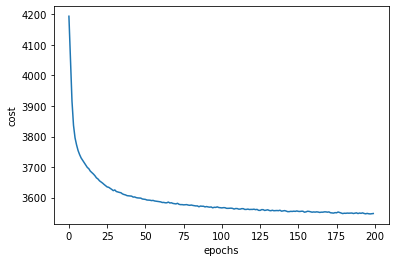

In [93]:
plot_cost()

In [94]:
costs

[4194.041615486145,
 4057.7398322820663,
 3916.6347568035126,
 3836.7427574396133,
 3795.647849678993,
 3772.576623439789,
 3753.8735934495926,
 3740.6010476350784,
 3729.621834039688,
 3722.0181008577347,
 3714.2353192567825,
 3707.46284532547,
 3698.9350974559784,
 3694.5140483379364,
 3686.5675216913223,
 3681.919345498085,
 3677.225814342499,
 3671.6359823942184,
 3664.595953464508,
 3660.8734484910965,
 3654.899105191231,
 3651.206655025482,
 3647.4152812957764,
 3642.9396311044693,
 3639.0598171949387,
 3634.8392322063446,
 3633.653220295906,
 3630.251900434494,
 3626.758528470993,
 3622.730162501335,
 3624.944821357727,
 3619.8549144268036,
 3618.2127809524536,
 3616.90280687809,
 3615.806809425354,
 3612.024171948433,
 3610.025764465332,
 3608.6909888982773,
 3606.2666798830032,
 3605.6569497585297,
 3604.751556634903,
 3604.6661418676376,
 3601.595474243164,
 3602.0182119607925,
 3599.859924554825,
 3598.8452385663986,
 3598.354840874672,
 3598.1953558921814,
 3595.35206687450